#Configurar

Años simulación.

In [1]:
anyo_inf = 2028
anyo_sup = 2030

Directorio raiz. Debe tenr una subcarpeta que se llame _Datasets_.

In [2]:
dir_raiz_datos = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/'
dir_raiz_model = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/Notebooks Colab/03 ajuste modelos/'

Códigos de coberturas de nubes.

In [3]:
cods_cob_descartar = [-128,0,99,128,65535]

Coberturas artificiales.

In [4]:
cod_ref_artif = 3 #30 #300

Radios de las vecindades definidos EN LA CONSTRUCCIÓN DE DATOS PARA ENTRENAMIENTO. Siempre incluir el cero (0).

In [5]:
radios = [0,3,10]

Nombre de la capa de inclinación, sin extensión.

In [6]:
nom_slp = 'slope_degrees_final'

Semilla para replicar la simulación.

In [7]:
semilla = 12345

#0. Entorno

In [8]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [9]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

In [10]:
# explorar archivos
import glob
import os

In [11]:
import pandas as pd

In [12]:
# histograma
from matplotlib import pyplot as plt
# barplot
import seaborn as sns

In [13]:
from pickle import load
clf = load(open(dir_raiz_model+'OneVsRestDecisionTree_n1.pkl', 'rb'))

Para hacer gráficas dinámicas.

In [14]:
import plotly.express as px

Para trabajar datos matriciales

In [15]:
import numpy as np
np.version.version # versioon utilizada y funcional dentro de este notebook

'1.22.4'

In [16]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Para escribir el dataset en Drive y en un .csv

In [17]:
import csv

Para tomar el tiempo de entrenamiento.

In [18]:
from datetime import datetime

Para generar aleatoriamente el conjunto de datos de Entrenaimento y Prueba.

In [19]:
import random
random.seed(semilla)

In [20]:
from numpy.random import choice

#1. Importar

**Drivers**

Extrae la ruta de los tifs de las capas.

In [21]:
drivers_dirs = glob.glob(os.path.join(dir_raiz_datos,"Drivers/*.tif"))

Se importan los rásters.

In [22]:
for dir in drivers_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [23]:
drivers_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in drivers_dirs ])

---

**Constrains**

Extrae la ruta de los tifs de las capas.

In [24]:
constrs_dirs = glob.glob(os.path.join(dir_raiz_datos,"Constrains/*.tif"))

Se importan los rásters.

In [25]:
for dir in constrs_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [26]:
constrs_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in constrs_dirs ])

---

**Última cobertura**

Extrae la ruta del tif que tiene los datos de coberturas del último periodo en la ruta.

In [27]:
cob_dirs = glob.glob(os.path.join(dir_raiz_datos,"Coberturas/*.tif"))

Se importan los rásters.

In [28]:
for dir in cob_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [29]:
cob_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in cob_dirs ])

Pasar coberturas a nivel 1.

In [30]:
def n1(num):
  if num not in cods_cob_descartar:
    return int(str(num)[0])
  else:
    return num

n1_cob = np.vectorize(n1)

for nom in cob_nams:
  globals()[ nom ] = n1_cob(locals()[ nom ])

#2. Explorar

**Drivers**

Se exploran los rásters de los Drivers.

In [31]:
drivers_nams

['centro_poblados_cabeceras_proximity',
 'dem_argelia',
 'drenaje_senc_proximity',
 'slope_degrees_final',
 'vias_proximity']

In [32]:
slope_degrees_final[slope_degrees_final < 0] = 0

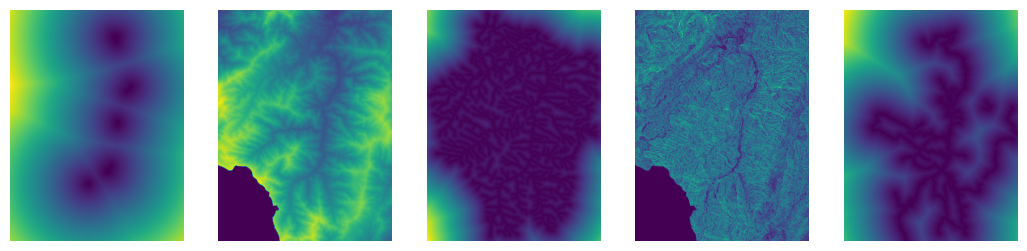

In [33]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [34]:
for nom in drivers_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

centro_poblados_cabeceras_proximity:
(3362, 2526)
 
dem_argelia:
(3362, 2526)
 
drenaje_senc_proximity:
(3362, 2526)
 
slope_degrees_final:
(3362, 2526)
 
vias_proximity:
(3362, 2526)
 


---

**Constrains**

In [35]:
constrs_nams

['mpio_mask_binario', 'raster_ambiental_binario', 'raster_comunitario_binario']

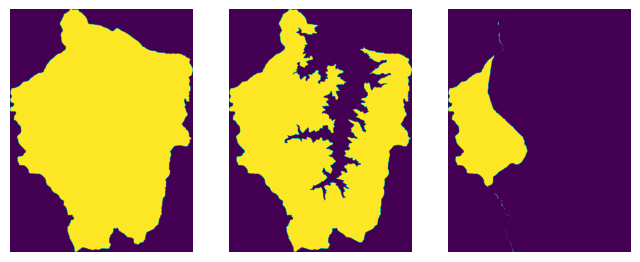

In [36]:
plt.figure(figsize=(8,8))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [37]:
for nom in constrs_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

mpio_mask_binario:
(3362, 2526)
 
raster_ambiental_binario:
(3362, 2526)
 
raster_comunitario_binario:
(3362, 2526)
 


In [38]:
for nom in constrs_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts() )
  print( ' ' )

mpio_mask_binario:
1    5415641
0    3076771
Name: valores, dtype: int64
 
raster_ambiental_binario:
1    4253873
0    4238539
Name: valores, dtype: int64
 
raster_comunitario_binario:
0    7515885
1     976527
Name: valores, dtype: int64
 


In [39]:
cob_nams

['cob_2000_2002',
 'cob_2005_2009',
 'cob_2010_2012',
 'cob_2018_2018',
 'cob_2023_2024_condi']

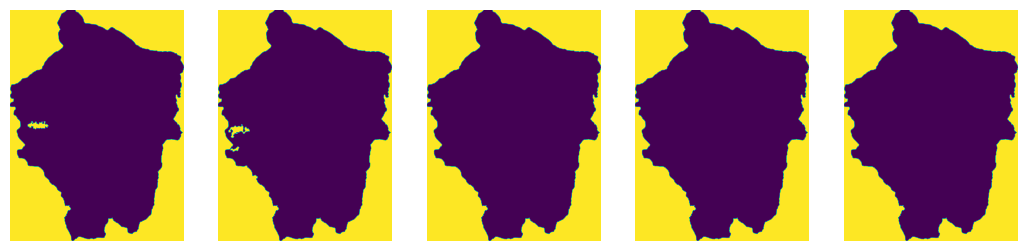

In [40]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow( np.isin(locals()[ nom ], cods_cob_descartar ) )
  plt.axis('off')
  ax
plt.show()

---

**Coberturas**

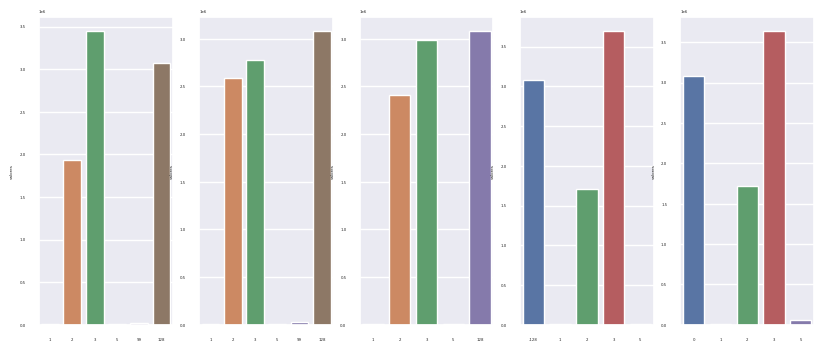

In [41]:
sns.set(font_scale=0.25)
plt.figure(figsize=(10,4))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  d = pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts()
  sns.barplot(x=d.index, y=d)
plt.show()

In [42]:
for nom in cob_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

cob_2000_2002:
(3362, 2526)
 
cob_2005_2009:
(3362, 2526)
 
cob_2010_2012:
(3362, 2526)
 
cob_2018_2018:
(3362, 2526)
 
cob_2023_2024_condi:
(3362, 2526)
 


In [43]:
cob_nams

['cob_2000_2002',
 'cob_2005_2009',
 'cob_2010_2012',
 'cob_2018_2018',
 'cob_2023_2024_condi']

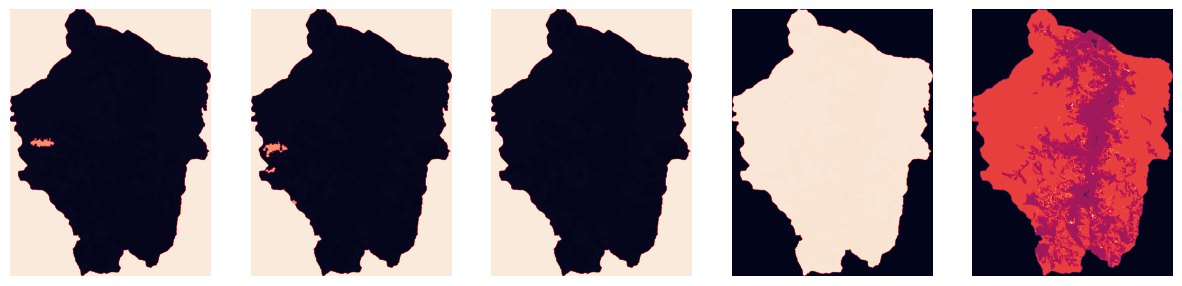

In [44]:
plt.figure(figsize=(15,15))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [45]:
s = pd.DataFrame(locals()[ cob_nams[0] ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame()

for nom in cob_nams[1:]:
  s = pd.merge( s , pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s.columns = cob_nams

s

<ipython-input-45-5b11f7a278d1>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  s = pd.merge( s , pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )


,cob_2000_2002,cob_2005_2009,cob_2010_2012,cob_2018_2018,cob_2023_2024_condi
valores,,,,,
-128,NaN,NaN,NaN,3076771.0,NaN
0,NaN,NaN,NaN,NaN,3076771.0
1,3644.0,5221.0,5221.0,10119.0,10584.0
2,1936852.0,2589834.0,2407907.0,1709104.0,1715524.0
3,3441833.0,2776909.0,2989453.0,3689860.0,3633088.0
5,12994.0,12998.0,12998.0,6558.0,56445.0
99,20256.0,30617.0,NaN,NaN,NaN
128,3076833.0,3076833.0,3076833.0,NaN,NaN


---

#3. Escenarios y periodos

Escenarios

In [46]:
constrs_nams.remove('mpio_mask_binario')

constrains_binario = np.invert( locals()[constrs_nams[0]] )
for n in range(len(constrs_nams)):
  constrains_binario = constrains_binario & np.invert( locals()[constrs_nams[n]] )
constrains_binario = constrains_binario & locals()['mpio_mask_binario']

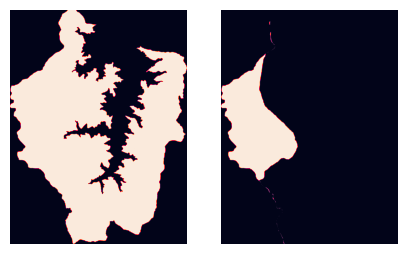

In [47]:
plt.figure(figsize=(5,5))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

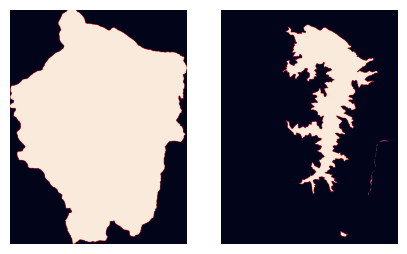

In [48]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
ax = plt.imshow(mpio_mask_binario)
plt.axis('off')
ax
plt.subplot(1,2,2)
ax = plt.imshow(constrains_binario)
plt.axis('off')
ax
plt.show()

Nombres de las capas de los rásters booleanos de los escenarios del estudio:
1.   Municipio completo
2.   Municipio con delimitación para el uso del suelo

In [49]:
esc_nams = ['mpio_mask_binario','constrains_binario']

#4. Índices para construcción del dataset de simulación

Lista de los números de periodo actual.

In [50]:
base = cob_nams[len(cob_nams)-1]
print(base)

cob_2023_2024_condi


Número de filas y columnas del área de estudio.

In [51]:
filas = range(mpio_mask_binario.shape[0])
columnas = range(mpio_mask_binario.shape[1])

Lista con códigos de coberturas en todos los periodos.

In [52]:
cob_cods_compl = []
for nom in cob_nams:
  cob_cods_compl.extend(list(set(locals()[nom].ravel().tolist())))
cob_cods_compl = sorted(list(set(cob_cods_compl)))
cob_cods = cob_cods_compl.copy()
for nom in cods_cob_descartar:
  if nom in cob_cods:
    cob_cods.remove(nom)
print(cob_cods_compl,)
print(cob_cods,)

[-128, 0, 1, 2, 3, 5, 99, 128]
[1, 2, 3, 5]


Matrices de datos simulados.

In [53]:
cob_cods_pred = [int(co) for co in clf.classes_]
num_cobs_pred = len(cob_cods_pred)
print(cob_cods_pred)

[1, 2, 3, 5]


In [54]:
simul_compl = np.empty(locals()[base].shape)
simul_compl[:] = np.nan
simul_compl = simul_compl.astype('int')

simul_condi = np.empty(locals()[base].shape)
simul_condi[:] = np.nan
simul_condi = simul_condi.astype('int')

Nombres de las características extraidas y su cantidad.

In [55]:
feature_nams = ['dr_'+d[:5] for d in drivers_nams] + ['slp_mean_'+str(r) for r in radios if r!=0] + ['SI_cVt_'+str(r)+'_'+str(c) for r in radios for c in cob_cods ]
print(feature_nams,)

['dr_centr', 'dr_dem_a', 'dr_drena', 'dr_slope', 'dr_vias_', 'slp_mean_3', 'slp_mean_10', 'SI_cVt_0_1', 'SI_cVt_0_2', 'SI_cVt_0_3', 'SI_cVt_0_5', 'SI_cVt_3_1', 'SI_cVt_3_2', 'SI_cVt_3_3', 'SI_cVt_3_5', 'SI_cVt_10_1', 'SI_cVt_10_2', 'SI_cVt_10_3', 'SI_cVt_10_5']


In [56]:
len(feature_nams)

19

Matrices de transición.

In [57]:
tm_compl = np.zeros((len(cob_cods),len(cob_cods)))
tm_compl = tm_compl.astype('int')

tm_condi = np.zeros((len(cob_cods),len(cob_cods)))
tm_condi = tm_condi.astype('int')

#5. Simulación

In [58]:
cont = 0

for i in filas:
  for j in columnas:

    # se imprime el avance de la tarea
    if cont % 1000000 == 0:
      print(
        datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "-" ,
        str(round(100*cont/(len(filas)*len(columnas)),0)) , "%"
      )
    cont += 1

    # se verifica que la ubicación haga parte del escenario completo
    # se verifica que no haya nubes en el uultimo periodo
    if locals()[esc_nams[0]][i,j] == 1 and locals()[ base ][i,j] not in cods_cob_descartar:

      # se extraen los features
      feat_vals = []
      for d in drivers_nams:
        feat_vals.append( locals()[d][i,j] )
      for r in radios:
        if r != 0:
          cx0 = int(np.where((i-r)<0,0,(i-r)))
          cx1 = i+r+1
          cy0 = int(np.where((j-r)<0,0,(j-r)))
          cy1 = j+r+1
          feat_vals.append( np.mean( locals()[nom_slp][cx0:cx1,cy0:cy1] ) )
      for r in radios:
        if r == 0:
          for c in cob_cods:
            feat_vals.append( int( locals()[ base ][i,j] == c ) )
        else:
          for c in cob_cods:
            cx0 = int(np.where((i-r)<0,0,(i-r)))
            cx1 = i+r+1
            cy0 = int(np.where((j-r)<0,0,(j-r)))
            cy1 = j+r+1
            feat_vals.append( np.sum( locals()[ base ][cx0:cx1,cy0:cy1] == c ) )

      predprob = clf.predict_proba(np.array(feat_vals).reshape(1,-1)).ravel()

      if sum(np.isnan(predprob)) == 0: # esta parte es un fraude porque predict_proba aveces lanza el vector en nans :(
        prediccion = choice(a=cob_cods_pred, p=predprob)
      else:
        prediccion = int(clf.predict(np.array(feat_vals).reshape(1,-1))[0])

      c_ini = cob_cods.index( locals()[ base ][i,j] )
      c_sim = cob_cods.index( prediccion )

      simul_compl[i,j] = prediccion
      tm_compl[c_ini,c_sim] += 1

      # se verifica que la ubicacioon hace parte del escenario condicionado
      if locals()[ base ][i,j] >= cod_ref_artif and prediccion < cod_ref_artif and constrains_binario[i,j] == 0:
        simul_condi[i,j] = locals()[ base ][i,j]
        tm_condi[c_ini,c_ini] += 1

      else:
        simul_condi[i,j] = prediccion
        tm_condi[c_ini,c_sim] += 1

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "- 100.0 %" )

11/07/2023 16:04:45 - 0.0 %
11/07/2023 16:08:03 - 12.0 %
11/07/2023 16:17:33 - 24.0 %
11/07/2023 16:32:39 - 35.0 %
11/07/2023 16:49:14 - 47.0 %
11/07/2023 17:03:41 - 59.0 %
11/07/2023 17:16:00 - 71.0 %
11/07/2023 17:25:24 - 82.0 %
11/07/2023 17:32:38 - 94.0 %
11/07/2023 17:34:05 - 100.0 %


#6. Resultados

In [59]:
pd.DataFrame(locals()[ cob_nams[len(cob_nams)-1] ].ravel(), columns= ['valores']).value_counts().sort_index()

valores
0          3076771
1            10584
2          1715524
3          3633088
5            56445
dtype: int64

In [60]:
pd.DataFrame(simul_compl.ravel(), columns= ['valores']).value_counts().sort_index()

valores             
-9223372036854775808    3076771
 1                        10531
 2                      2163240
 3                      3165970
 5                        75900
dtype: int64

In [61]:
pd.DataFrame(simul_condi.ravel(), columns= ['valores']).value_counts().sort_index()

valores             
-9223372036854775808    3076771
 1                        10531
 2                      1618565
 3                      3706791
 5                        79754
dtype: int64

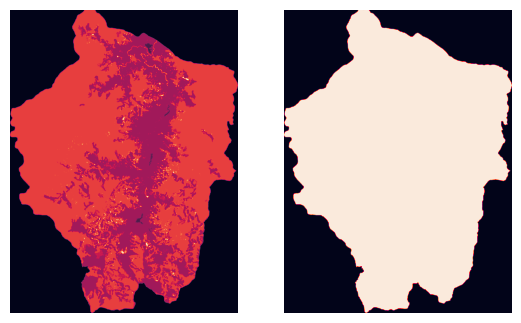

In [62]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
ax = plt.imshow(locals()[ cob_nams[len(cob_nams)-1] ])
plt.axis('off')
ax

plt.subplot(1,3,2)
ax = plt.imshow(simul_compl)
plt.axis('off')
ax

plt.subplot(1,3,2)
ax = plt.imshow(simul_condi)
plt.axis('off')
ax

plt.show()

In [63]:
s = pd.DataFrame(locals()[ cob_nams[len(cob_nams)-1] ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame()

s = pd.merge( s , pd.DataFrame(simul_compl.ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s = pd.merge( s , pd.DataFrame(simul_condi.ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s.columns = [cob_nams[len(cob_nams)-1], 'simul_compl', 'simul_condi']

s

,cob_2023_2024_condi,simul_compl,simul_condi
valores,,,
-9223372036854775808,NaN,3076771.0,3076771.0
0,3076771.0,NaN,NaN
1,10584.0,10531.0,10531.0
2,1715524.0,2163240.0,1618565.0
3,3633088.0,3165970.0,3706791.0
5,56445.0,75900.0,79754.0


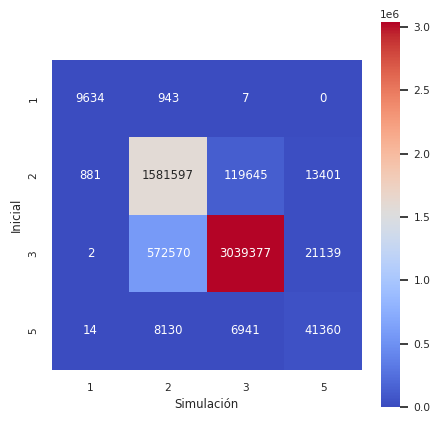

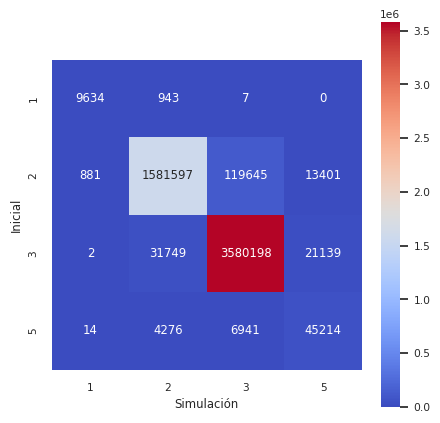

In [64]:
sns.set(rc={'figure.figsize':(5,5)}, font_scale=0.7)
y_labels=cob_cods
sns.heatmap(tm_compl, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Simulación")
plt.ylabel("Inicial")
plt.show()

sns.heatmap(tm_condi, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Simulación")
plt.ylabel("Inicial")
plt.show()

In [65]:
tm_compl = pd.DataFrame(tm_compl)
tm_condi = pd.DataFrame(tm_condi)

tm_compl = tm_compl.set_index([y_labels])
tm_condi = tm_condi.set_index([y_labels])

tm_compl.columns = y_labels
tm_condi.columns = y_labels

In [66]:
with pd.ExcelWriter( path=dir_raiz_datos+"/Datasets/tm_simu"+str(anyo_inf)+"_"+str(anyo_sup)+".xlsx") as writer:
  tm_compl.to_excel(writer, sheet_name="compl")
  tm_condi.to_excel(writer, sheet_name="condi")

In [67]:
rs.open( cob_dirs[0] ).meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 128.0,
 'width': 2526,
 'height': 3362,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["MAGNA_SIRGAS_Origen_Nacional",GEOGCS["MAGNA-SIRGAS",DATUM["Marco_Geocentrico_Nacional_de_Referencia",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6686"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4686"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",4],PARAMETER["central_meridian",-73],PARAMETER["scale_factor",0.9992],PARAMETER["false_easting",5000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(12.0, 0.0, 4510116.0,
        0.0, -12.0, 1836096.0)}

In [68]:
kwargs = rs.open( cob_dirs[0] ).meta

with rs.open( os.path.join(dir_raiz_datos,"Coberturas/cob_"+str(anyo_inf)+"_"+str(anyo_sup)+"_compl.tif") , 'w', **kwargs) as dst:
  dst.write_band(1, simul_compl.astype(rs.int32))

with rs.open( os.path.join(dir_raiz_datos,"Coberturas/cob_"+str(anyo_inf)+"_"+str(anyo_sup)+"_condi.tif") , 'w', **kwargs) as dst:
  dst.write_band(1, simul_condi.astype(rs.int32))